## Building model
### Libraries

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
#import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.models import load_model
from keras.regularizers import l2
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


### Loading datasets

In [2]:
actions = np.array(['adios', 'amor', 'animal',
                    'bienvenida', 'gracias', 'hola', 
                    'hombre', 'internet', 'mujer',
                    'nino_na', 'objeto', 'persona',
                    'radio', 'television', 'tristeza'])

In [3]:
data_folder='dataset/size_0_3'

X_train=np.load(os.path.join(data_folder, 'X_train.npy'))
X_val=np.load(os.path.join(data_folder, 'X_test.npy'))
y_train=np.load(os.path.join(data_folder, 'y_train.npy'))
y_val=np.load(os.path.join(data_folder, 'y_test.npy'))

### Build and Train LSTM Neural Network

In [4]:
log_dir=os.path.join('Logs/log_pt10_noes')
tb_callback=TensorBoard(log_dir=log_dir)

In [4]:
# Build the LSTM model with fine tunning

model=Sequential()
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', kernel_regularizer=l2(0.01), input_shape=(30, 1662)))
model.add(Dropout(0.2))  # Dropout para evitar sobreajuste
model.add(LSTM(128, return_sequences=True, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))  # Dropout para evitar sobreajuste
model.add(LSTM(64, return_sequences=False, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))  # Dropout para evitar sobreajuste
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))  # Dropout para evitar sobreajuste
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(actions.shape[0], activation='softmax'))

In [5]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)               

In [6]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [7]:
# Define early stopping
early_stopping=EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)


In [8]:
# Train the model
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1200, callbacks=[early_stopping])

Epoch 1/1200
10/10 [==============================] - 6s 192ms/step - loss: 11.7704 - categorical_accuracy: 0.0667 - val_loss: 9.3737 - val_categorical_accuracy: 0.0296
Epoch 2/1200
10/10 [==============================] - 1s 121ms/step - loss: 9.5281 - categorical_accuracy: 0.0508 - val_loss: 8.6543 - val_categorical_accuracy: 0.0296
Epoch 3/1200
10/10 [==============================] - 1s 124ms/step - loss: 8.3924 - categorical_accuracy: 0.0571 - val_loss: 8.0375 - val_categorical_accuracy: 0.0296
Epoch 4/1200
10/10 [==============================] - 1s 123ms/step - loss: 7.8396 - categorical_accuracy: 0.0730 - val_loss: 7.6102 - val_categorical_accuracy: 0.0370
Epoch 5/1200
10/10 [==============================] - 1s 122ms/step - loss: 7.4496 - categorical_accuracy: 0.1016 - val_loss: 7.2102 - val_categorical_accuracy: 0.0444
Epoch 6/1200
10/10 [==============================] - 1s 127ms/step - loss: 7.0678 - categorical_accuracy: 0.0825 - val_loss: 6.8439 - val_categorical_accuracy

In [9]:
%load_ext tensorboard
%tensorboard --logdir=./Logs

Reusing TensorBoard on port 6006 (pid 21412), started 8:04:15 ago. (Use '!kill 21412' to kill it.)

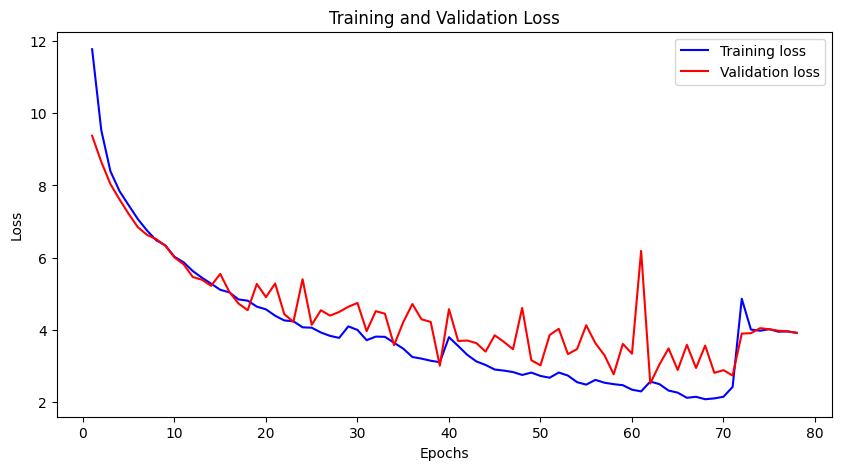

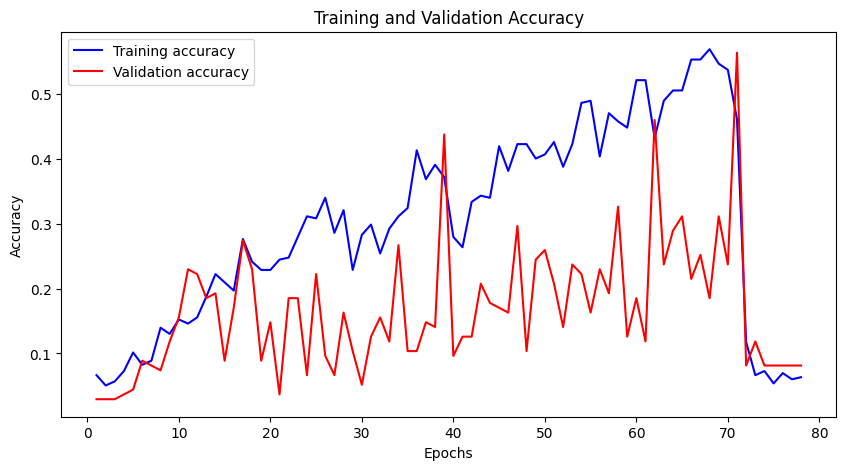

In [9]:
# Obtener las métricas de pérdida y precisión
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy=history.history['categorical_accuracy']
val_accuracy=history.history['val_categorical_accuracy']
epochs = range(1, len(train_loss) + 1)

# Gráfica de pérdida
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de precisión
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions

In [10]:
res=model.predict(X_val)

5/5 [==============================] - 1s 39ms/step


In [11]:
actions[np.argmax(res[0])]

'objeto'

In [12]:
actions[np.argmax(y_val[0])]

'animal'

## Save Weights
### Saving model

In [53]:
# Check if the directory 'models' already exists
if not os.path.exists("models"):
    os.makedirs("models")

In [54]:
# Saving the model
model.save("models/sl_model_ver1.h5")

### Loading model

In [15]:
# Path to the model file
model_path="models/sl_model_ver1.h5"

In [16]:
# Load the model
model=load_model(model_path)

In [17]:
# Check the structure model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 597071 (2.28 MB)
Trainable params: 597071 

In [18]:
model.load_weights(model_path)

### Evaluation using Confusion Matrix and Accuracy

In [13]:
ypred=model.predict(X_val)

5/5 [==============================] - 0s 45ms/step


In [14]:
ytrue=np.argmax(y_val, axis=1)
ypred=np.argmax(ypred, axis=1)

In [15]:
# Calcular la matriz de confusión multilabel
confusion_matrix=multilabel_confusion_matrix(ytrue, ypred)
confusion_matrix

array([[[127,   1],
        [  5,   2]],

       [[121,   0],
        [ 14,   0]],

       [[123,   0],
        [ 12,   0]],

       [[119,  10],
        [  5,   1]],

       [[129,   0],
        [  0,   6]],

       [[112,  14],
        [  0,   9]],

       [[107,  16],
        [ 12,   0]],

       [[110,  14],
        [  8,   3]],

       [[125,   0],
        [ 10,   0]],

       [[125,   0],
        [ 10,   0]],

       [[106,  25],
        [  0,   4]],

       [[125,   0],
        [ 10,   0]],

       [[124,   6],
        [  5,   0]],

       [[113,  14],
        [  8,   0]],

       [[114,  10],
        [ 11,   0]]], dtype=int64)

In [16]:
len(confusion_matrix)

15

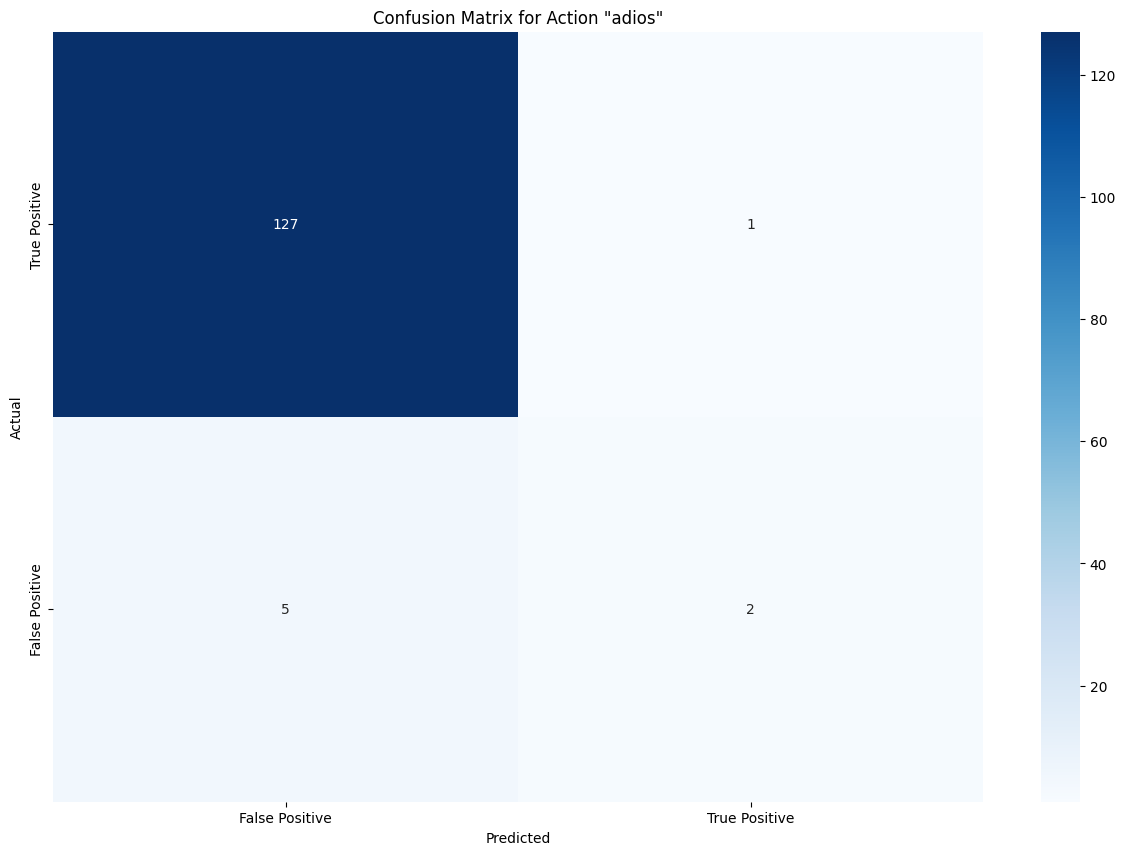

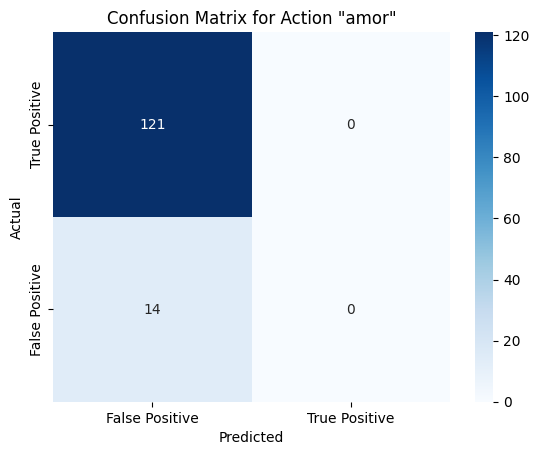

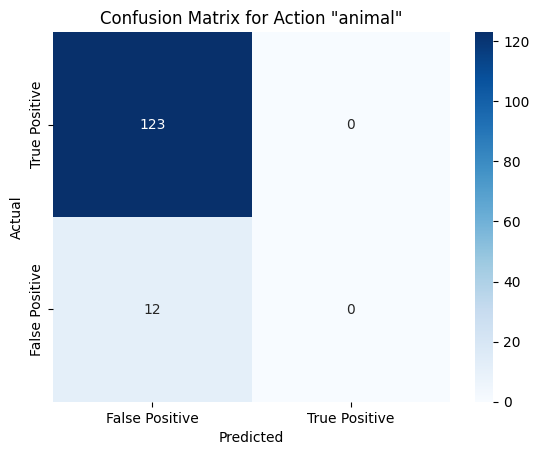

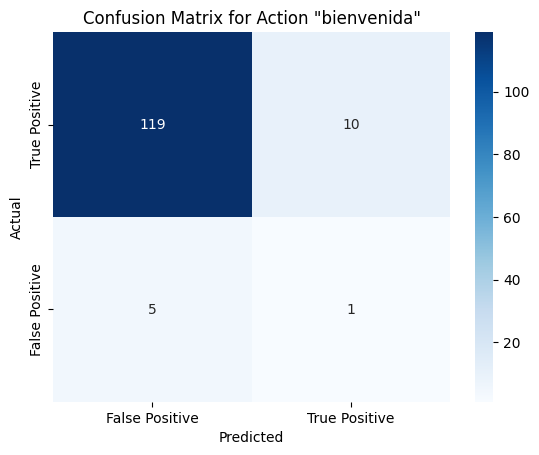

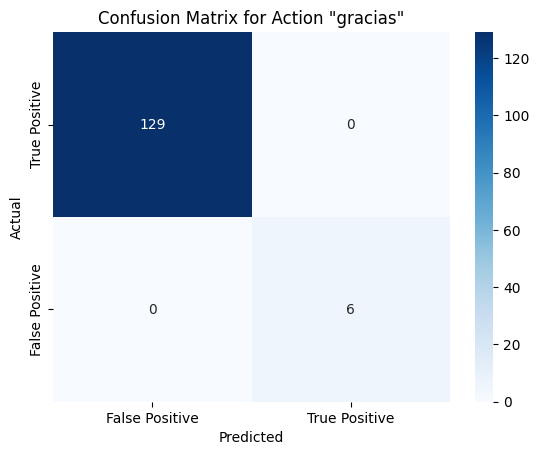

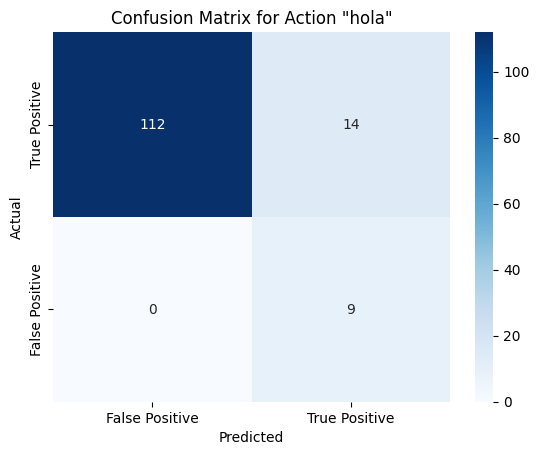

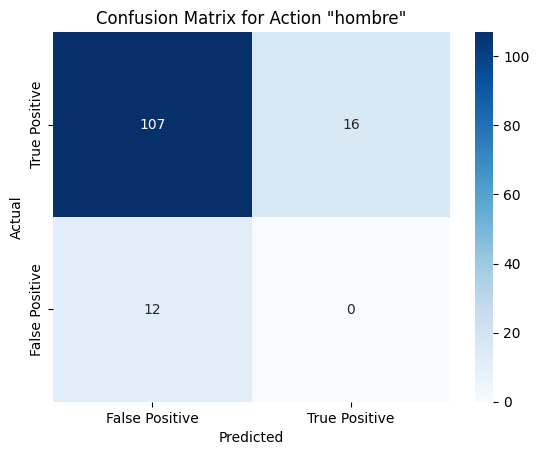

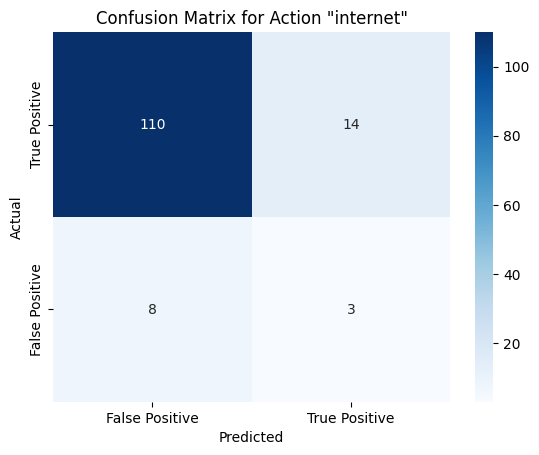

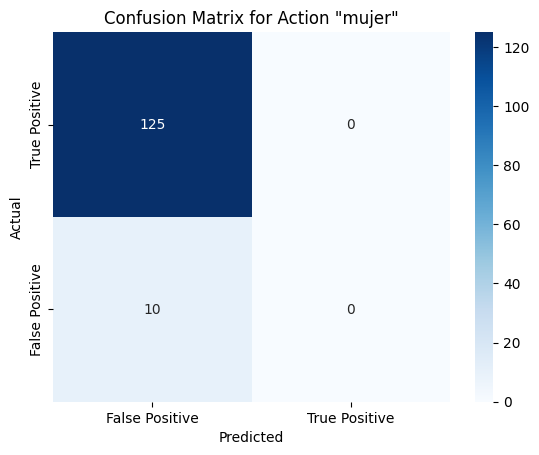

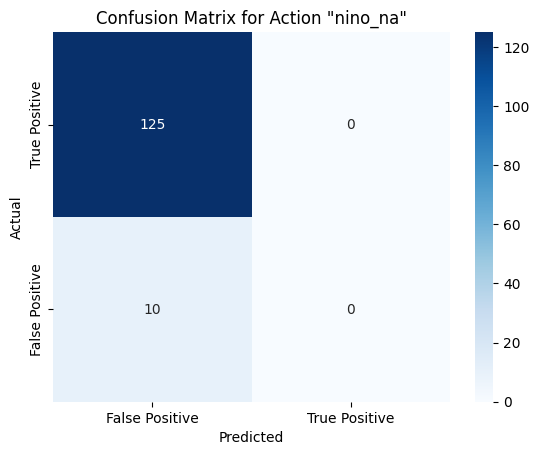

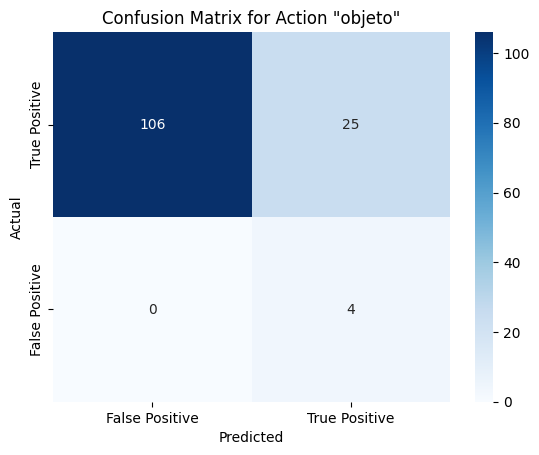

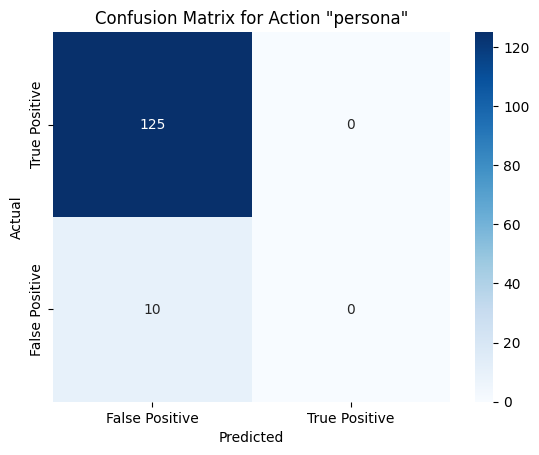

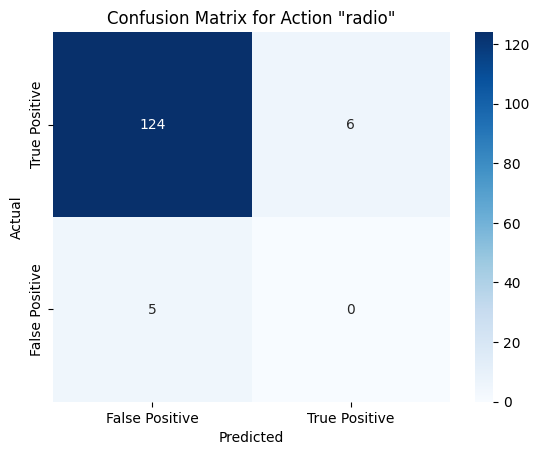

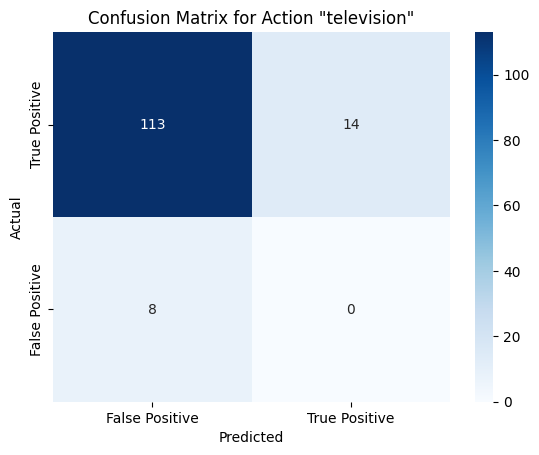

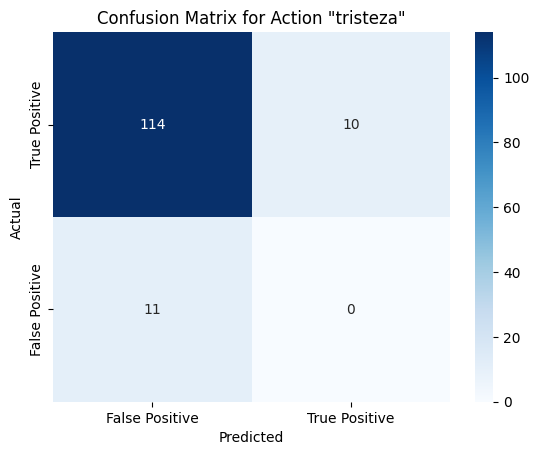

In [17]:
# Visualización usando Seaborn
plt.figure(figsize=(15, 10))
for i in range(len(confusion_matrix)):
    # Verificar si hay alguna predicción para esta acción
    if np.any(np.array([ytrue == i, ypred == i]).T):
        sns.heatmap(confusion_matrix[i], annot=True, fmt='.0f', cmap='Blues', 
                    xticklabels=['False Positive', 'True Positive'],
                    yticklabels=['True Positive', 'False Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Action "{actions[i]}"')
        plt.show()

In [18]:
ytrue = np.argmax(y_val, axis=1).tolist()
ypred = model.predict(X_val)
ypred = np.argmax(ypred, axis=1).tolist()
accuracy_score(ytrue, ypred)

5/5 [==============================] - 0s 45ms/step


0.18518518518518517